## 📚 Importamos librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo
sns.set_style("whitegrid")
sns.set_palette("husl")
%matplotlib inline

## 📊 Dataset sobre **Uso de Dispositivos Móviles y Comportamiento del Usuario**

In [2]:
# Carga y exploración inicial del dataset
file_id = '14Sd4B2mtU2JOXnu9BEW3uWMkjUN5AlL_'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

df.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
649,650,Xiaomi Mi 11,Android,186,5.4,1627,58,790,31,Female,3
549,550,Samsung Galaxy S21,Android,172,4.0,1047,32,508,21,Female,2
149,150,Google Pixel 5,Android,149,3.7,873,34,459,51,Male,2
639,640,Google Pixel 5,Android,538,9.8,2778,91,2080,35,Female,5
481,482,Samsung Galaxy S21,Android,528,10.4,2717,87,2140,34,Male,5
190,191,iPhone 12,iOS,134,2.2,917,23,423,23,Male,2
83,84,Xiaomi Mi 11,Android,39,1.8,368,11,105,19,Male,1
57,58,OnePlus 9,Android,539,8.4,2796,89,2415,26,Male,5
357,358,iPhone 12,iOS,488,9.5,2840,92,1986,48,Female,5
35,36,Samsung Galaxy S21,Android,32,1.2,580,19,153,20,Female,1


In [3]:
# Información básica
print("=== Información básica del dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
print(df.info())

=== Información básica del dataset ===
Filas: 700, Columnas: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


###🔍 Información contenida en el dataset
El dataset elegido contiene información sobre el uso de dispositivos móviles y el comportamiento de los usuarios. Las características principales son:

- **ID de usuario**: Identificador único para cada usuario.
- **Modelo del dispositivo**: Modelo del teléfono inteligente del usuario.
- **Sistema operativo**: El sistema operativo del dispositivo (iOS o Android).
- **Tiempo de uso de la aplicación**: Tiempo diario dedicado a aplicaciones móviles, medido en minutos.
- **Tiempo de pantalla encendida**: Promedio de horas por día que la pantalla está activa.
- **Consumo de batería**: Consumo diario de batería en mAh.
- **Número de aplicaciones instaladas**: Total de aplicaciones disponibles en el dispositivo.
- **Uso de datos**: Consumo diario de datos móviles en megabytes.
- **Edad**: Edad del usuario.
- **Género**: Género del usuario (Masculino o Femenino).
- **Clase de comportamiento del usuario**: Clasificación del comportamiento del usuario según patrones de uso (1 a 5).

## ✨ Limpieza y preparación de datos

In [4]:
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# Verificación de duplicados
print("\n=== Valores duplicados ===")
print(f"Total de duplicados: {df.duplicated().sum()}")



=== Valores nulos ===
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

=== Valores duplicados ===
Total de duplicados: 0


In [5]:
print("\n=== Estadísticas descriptivas ===")
stats_df = df.describe().T
stats_df['skew'] = df.skew(numeric_only=True)
stats_df['kurtosis'] = df.kurtosis(numeric_only=True)

# Mostrar como tabla visual con colores y 2 decimales
stats_df.style\
    .background_gradient(cmap='PuBu')\
    .format(precision=2)


=== Estadísticas descriptivas ===


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
User ID,700.00,350.50,202.22,1.00,175.75,350.50,525.25,700.00,0.00,-1.20
App Usage Time (min/day),700.00,271.13,177.20,30.00,113.25,227.50,434.25,598.00,0.37,-1.26
Screen On Time (hours/day),700.00,5.27,3.07,1.00,2.50,4.90,7.40,12.00,0.46,-0.82
Battery Drain (mAh/day),700.00,1525.16,819.14,302.00,722.25,1502.50,2229.50,2993.00,0.13,-1.28
Number of Apps Installed,700.00,50.68,26.94,10.00,26.00,49.00,74.00,99.00,0.11,-1.25
Data Usage (MB/day),700.00,929.74,640.45,102.00,373.00,823.50,1341.00,2497.00,0.70,-0.46
Age,700.00,38.48,12.01,18.00,28.00,38.00,49.00,59.00,0.03,-1.23
User Behavior Class,700.00,2.99,1.40,1.00,2.00,3.00,4.00,5.00,0.02,-1.28


### 📊 Resumen Estadístico del Dataset

Esta tabla muestra un análisis descriptivo de distintas variables relacionadas con el uso de dispositivos móviles por parte de 700 usuarios. Cada fila representa una variable y cada columna da un tipo de información estadística sobre esa variable.

#### 🔍 Columnas clave:
- **count**: Cantidad de datos disponibles (en todos los casos, 700 usuarios).
- **mean**: Promedio de cada variable.
- **std**: Desviación estándar, indica cuánto varían los valores respecto al promedio.
- **min, 25%, 50%, 75%, max**: Valores mínimos, cuartiles y máximos. Sirven para ver cómo se distribuyen los datos.
- **skew (asimetría)**: Mide si los datos están distribuidos de manera simétrica (valor cercano a 0) o si están sesgados.
- **kurtosis (curtosis)**: Mide qué tan extremos o concentrados son los valores.

---

### 🧠 Interpretación por variable

- **User ID**: Identificador del usuario. No tiene significado estadístico. Distribución simétrica.

- **App Usage Time (min/day)**:  
  Uso promedio de aplicaciones: **271 minutos (≈4.5 horas)** por día. Valores entre 30 y 598 minutos. Asimetría positiva (**0.37**) indica que unos pocos usuarios usan mucho más que el resto.

- **Screen On Time (hours/day)**:  
  Pantalla encendida en promedio **5.27 horas/día**. Ligera asimetría positiva (**0.46**).

- **Battery Drain (mAh/day)**:  
  Consumo medio de batería: **1525 mAh/día**, con valores extremos que alcanzan casi **3000 mAh**. Distribución relativamente simétrica.

- **Number of Apps Installed**:  
  Promedio de **56 apps** instaladas por usuario. Valores entre 10 y 99. Distribución equilibrada.

- **Data Usage (MB/day)**:  
  Promedio de consumo de datos: **930 MB/día**, con valores máximos cercanos a **2.5 GB**. Asimetría positiva notable (**0.70**) indica usuarios con uso de datos muy elevado.

- **Age**:  
  Rango de edad entre **18 y 59 años**, con promedio de **38 años**. Distribución equilibrada.

- **User Behavior Class**:  
  Variable categórica que clasifica el comportamiento del usuario (valores entre 1 y 5). Distribución balanceada.

---

Los colores resaltados en la tabla indican valores que se consideran atípicos o extremos en comparación con los rangos normales esperados:
Ejemplos de celdas resaltadas:

1. App Usage Time (min/day): 271.13 minutos (4.5 horas) - Uso muy alto de aplicaciones
2. Battery Drain (mAh/day): 1525.16 mAh - Consumo de batería muy elevado
3. Data Usage (MB/day): 929.74 MB - Consumo de datos alto (casi 1GB diario)
4. Number of Apps Installed: 50.68 apps - Cantidad considerable de aplicaciones instaladas

### 🟡 HALLAZGOS CLAVES

Los usuarios muestran un **uso moderado-alto** de sus dispositivos, con gran variabilidad entre individuos. Hay usuarios que usan el teléfono solo 30 minutos al día mientras otros lo usan casi 10 horas. El consumo de batería y datos también varía enormemente.
Los valores de `skewness (asimetría)` cercanos a 0 indican distribuciones relativamente normales, mientras que `kurtosis` negativa sugiere distribuciones más planas que una normal estándar.


## 💻 Análisis de variables numéricas

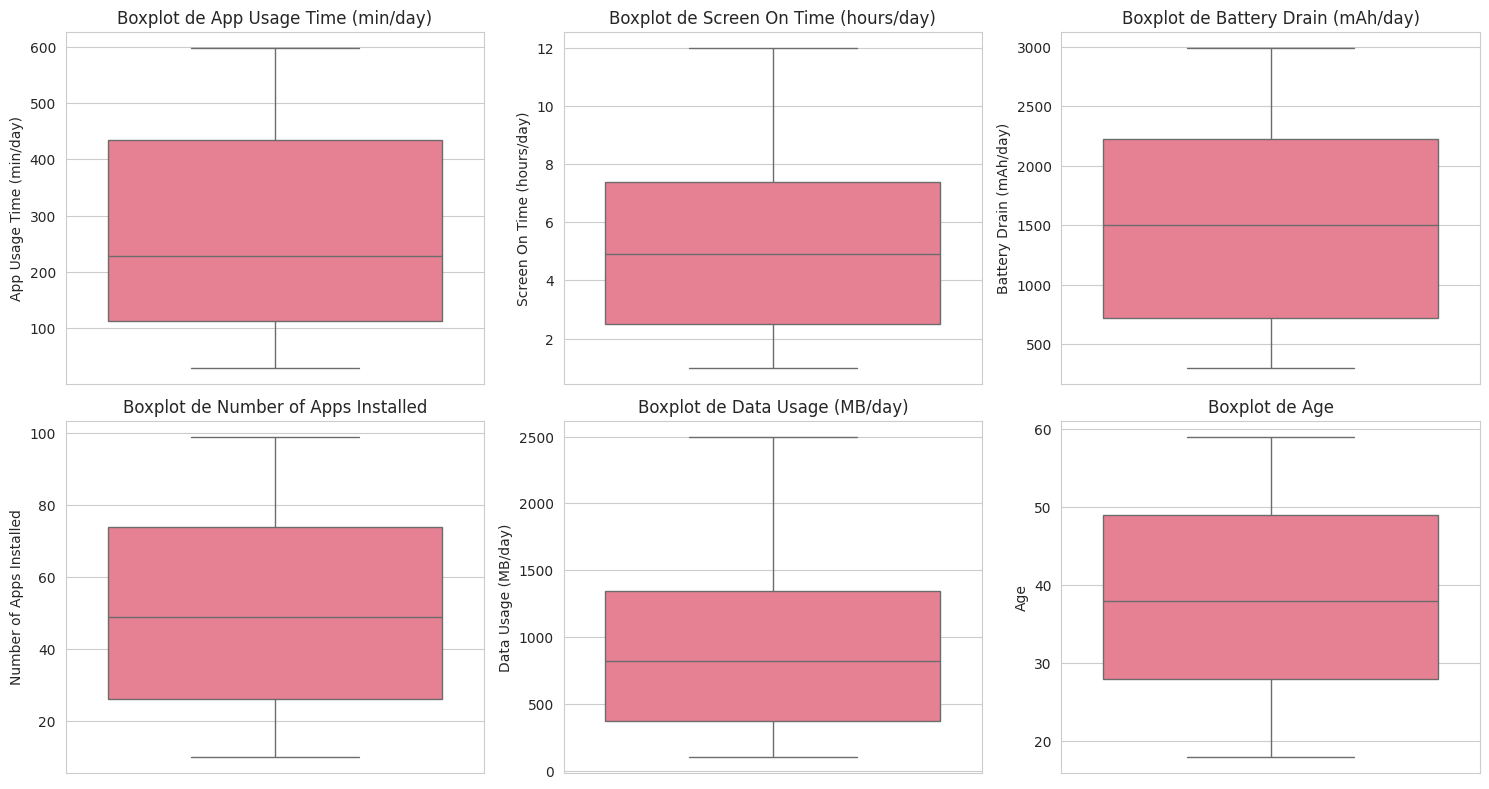

In [6]:
numeric_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
               'Battery Drain (mAh/day)', 'Number of Apps Installed',
               'Data Usage (MB/day)', 'Age']

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


Los siguientes boxplots muestran la **distribución y variabilidad** de seis métricas clave relacionadas con el uso de dispositivos móviles. Se agrupan en dos bloques: comportamiento de uso y características del usuario.

---

### 🟠 **Bloque 1: Comportamiento de Uso**

### 📱 **App Usage Time (Tiempo de uso de apps)**
- **Mediana**: ~230 minutos (≈3.8 horas diarias)
- **Rango intercuartílico**: ~120 a 430 minutos
- **Interpretación**: La mayoría de usuarios usa apps entre **2 y 7 horas diarias**, lo que indica una **distribución amplia** del tiempo de uso.

### 💡 **Screen On Time (Tiempo de pantalla encendida)**
- **Mediana**: ~5 horas diarias  
- **Rango intercuartílico**: ~2.5 a 7.5 horas  
- **Interpretación**: Tiene una distribución más **compacta**, con la mayoría de los usuarios manteniendo la pantalla encendida dentro de ese rango.

### 🔋 **Battery Drain (Consumo de batería)**
- **Mediana**: ~1500 mAh diarios  
- **Rango intercuartílico**: ~800 a 2200 mAh  
- **Interpretación**: Se observa una **gran variabilidad** en el consumo de batería, desde usuarios moderados hasta muy intensivos.

---

### 🟢 **Bloque 2: Características del Usuario**

### 📱 **Number of Apps Installed (Número de apps instaladas)**
- **Mediana**: ~50 aplicaciones  
- **Rango intercuartílico**: ~25 a 75 apps  
- **Interpretación**: La mayoría de usuarios tiene entre **25 y 75 apps instaladas**, con una distribución bastante simétrica.

### 🌐 **Data Usage (Uso de datos MB/day)**
- **Mediana**: ~800 MB diarios  
- **Rango intercuartílico**: ~400 a 1300 MB  
- **Interpretación**: **Gran variabilidad** en el uso de datos, desde usuarios que consumen poco hasta otros que superan **1 GB diario**.

### 👤 **Age (Edad)**
- **Mediana**: ~38 años  
- **Rango intercuartílico**: ~28 a 49 años  
- **Interpretación**: Población principalmente **adulta joven a mediana**, con distribución simétrica.

---

## 📝 Observaciones Claves

- **Distribuciones**: La mayoría de las variables presentan distribuciones **simétricas**, sin valores atípicos extremos visibles.
- **Variabilidad**: Las variables **Data Usage**, **App Usage Time** y **Battery Drain** muestran mayor dispersión, lo que sugiere diferentes niveles de intensidad en el uso del dispositivo.
- **Consistencia**: Variables como **Age**, **Screen On Time** y **Number of Apps** tienen distribuciones más compactas, lo que indica patrones más estables entre los usuarios.
- **Perfiles de Usuario**:
  - **Usuarios livianos**: bajo consumo de datos, pocas horas de uso y pocas apps.
  - **Usuarios intensivos**: alto consumo de batería, muchas apps, uso diario prolongado.
  - **Población objetivo**: personas de entre **28 y 49 años**, probablemente adultos jóvenes trabajadores.
- **Conclusión**: El dataset refleja una **población heterogénea**, con distintos perfiles de comportamiento digital, útil para segmentación o personalización de servicios tecnológicos.



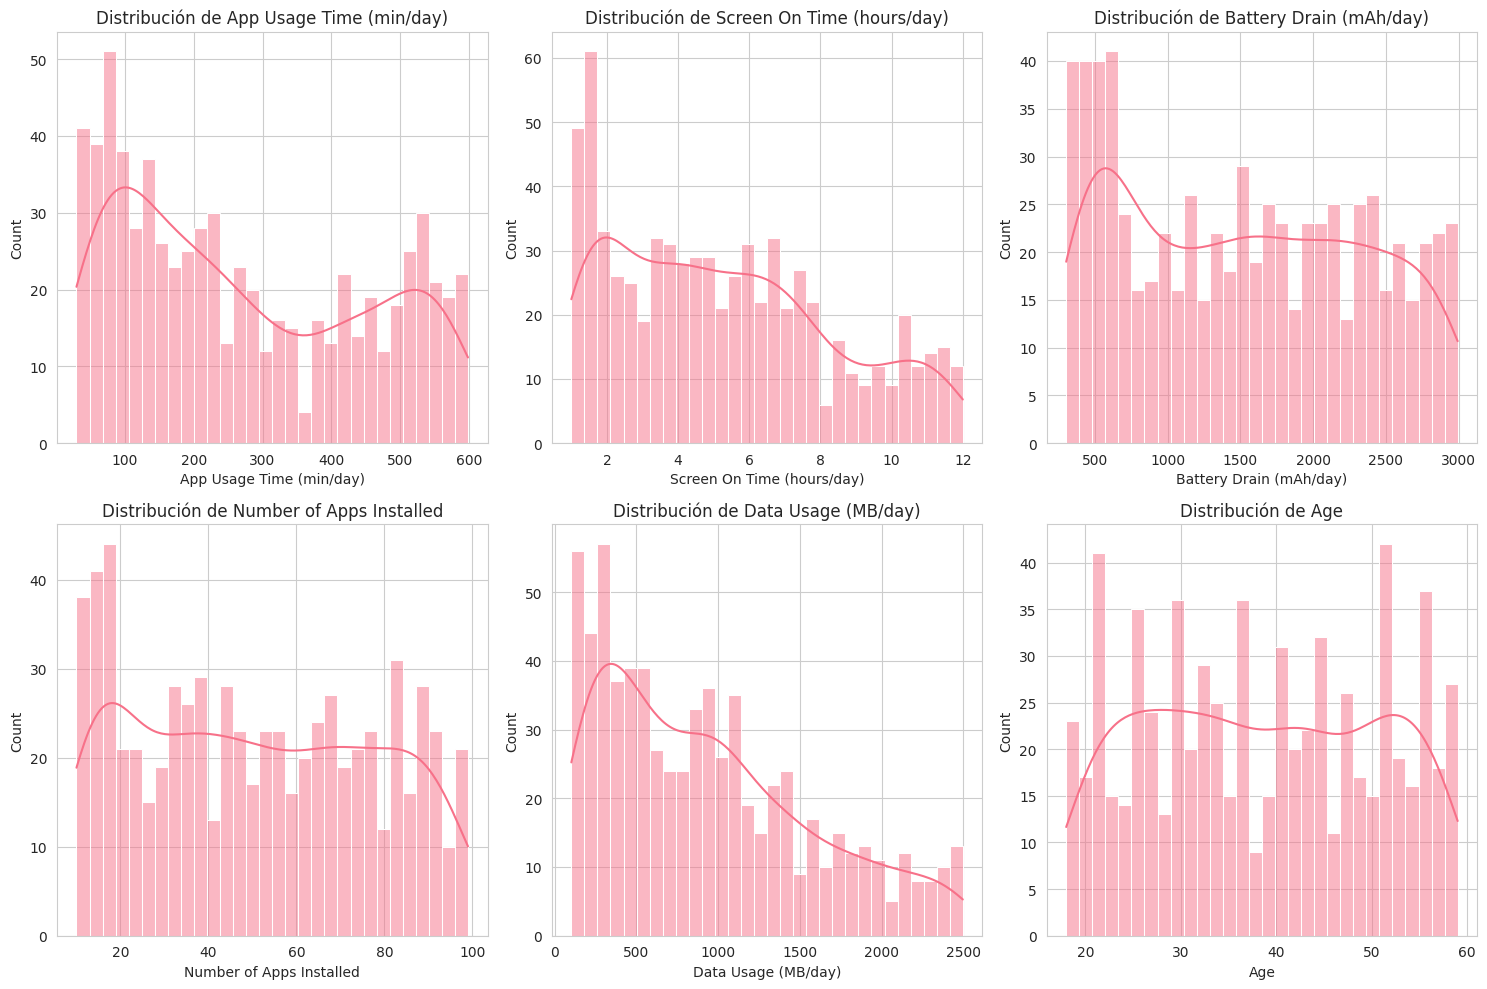

In [7]:
# Histogramas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Estos histogramas revelan las **formas de distribución** de cada variable del dataset. A continuación, se presenta el análisis detallado:

---

### 🔍 **Distribuciones por Variable**

### 📱 **App Usage Time (min/day)**
- **Distribución bimodal** con picos en ~100 y ~600 minutos.
- Sugiere la existencia de **dos grupos diferenciados de usuarios**: uso ligero vs uso intensivo.

### 💡 **Screen On Time (hours/day)**
- **Sesgo a la derecha** con cola larga.
- La mayoría de usuarios tiene entre 2 y 6 horas de pantalla activa, pero hay algunos extremos que superan las 10 horas.

### 🔋 **Battery Drain (mAh/day)**
- **Distribución multimodal**, con varios picos a lo largo del rango.
- Indica **diferentes patrones de consumo energético**, posiblemente relacionados con distintos tipos de uso.

### 📲 **Number of Apps Installed**
- **Sesgo a la derecha**, con mayor frecuencia en torno a las 25 apps.
- Pocos usuarios tienen un número muy alto de aplicaciones instaladas.

### 🌐 **Data Usage (MB/day)**
- **Distribución exponencial decreciente**.
- La mayoría de los usuarios consume menos de 500MB diarios, pero existen usuarios con uso mucho más alto (>1GB).

### 👤 **Age**
- **Distribución relativamente uniforme** entre los 25 y 55 años.
- Se observan **ligeros picos** en algunos tramos, lo que indica una **población diversa** en edad.

---

## 📝 **Hallazgos Clave**

- 📌 **Segmentación clara de usuarios**: Las distribuciones bimodales y multimodales sugieren distintos perfiles de comportamiento.
- 🔋 **Usuarios intensivos ("power users")**: Las colas largas en variables como App Usage, Screen Time y Data Usage indican un subgrupo de usuarios muy activos.
- 📉 **Patrones no normales**: Ninguna variable presenta una distribución normal. Hay sesgos, colas y múltiples modas.
- 🎯 **Diversidad de comportamientos**: Existe una alta variabilidad en el dataset, lo cual es clave para realizar segmentaciones de usuarios y diseñar estrategias diferenciadas.

##💻 Análisis por categorías (Sistema Operativo y Género)

In [8]:
categorical_cols = ['Operating System', 'Gender']

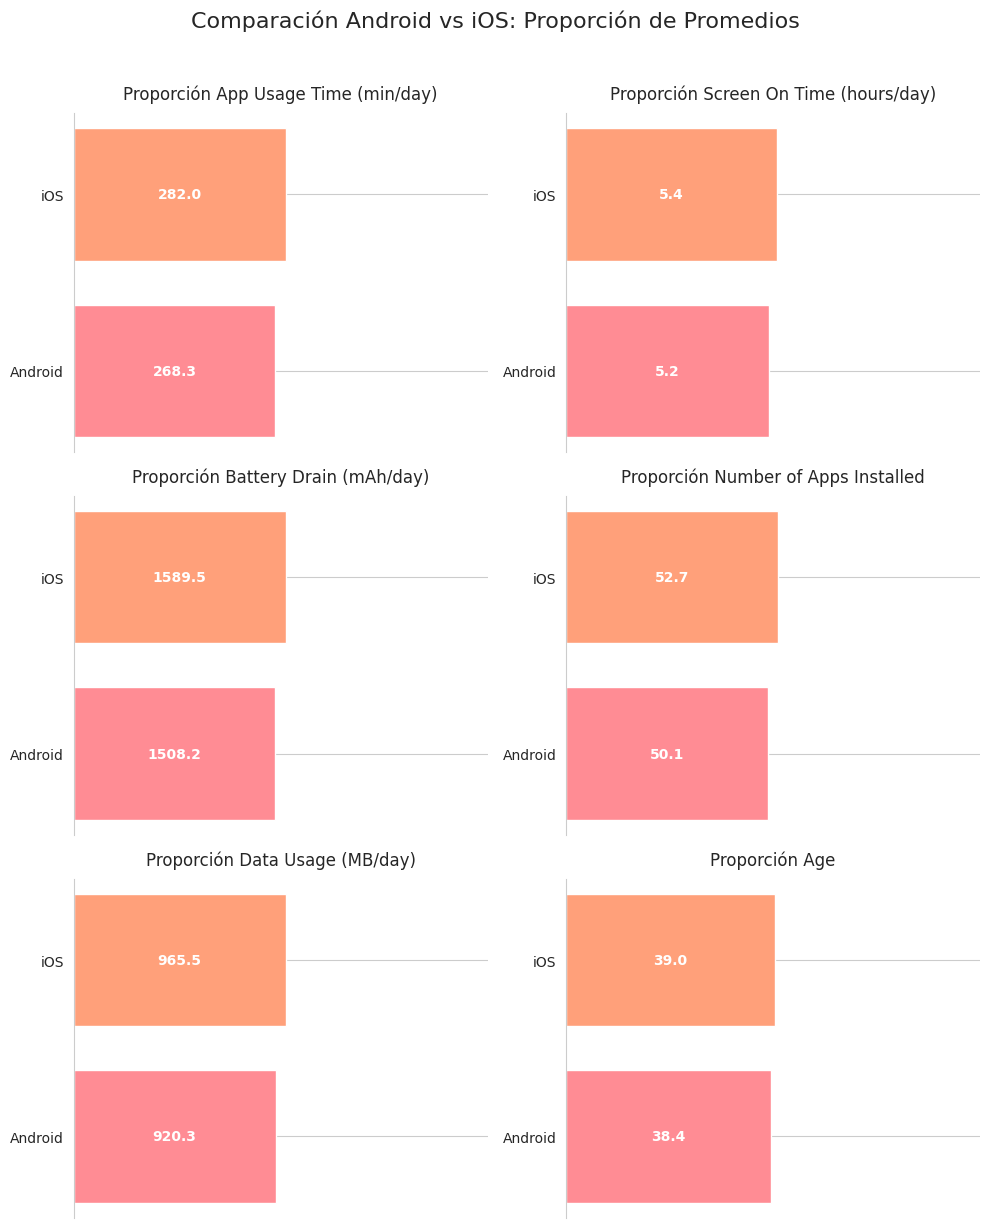

In [9]:
plt.figure(figsize=(10, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)

    android_val = df[df['Operating System'] == 'Android'][col].mean()
    ios_val = df[df['Operating System'] == 'iOS'][col].mean()
    total = android_val + ios_val

    # Usamos posiciones numéricas en el eje Y para controlar el espacio
    y_pos = [0.4, 0.6]  # Más cerca entre sí que [0, 1]
    bar_height = 0.15   # Más fino

    # Barras
    plt.barh(y_pos[0], android_val / total * 100, color='#FF8C94', height=bar_height)
    plt.barh(y_pos[1], ios_val / total * 100, color='#FFA07A', height=bar_height)

    # Anotaciones
    plt.text(android_val / total * 100 / 2, y_pos[0], f"{android_val:.1f}",
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(ios_val / total * 100 / 2, y_pos[1], f"{ios_val:.1f}",
             ha='center', va='center', color='white', fontweight='bold')

    # Etiquetas manuales del eje Y
    plt.yticks(y_pos, ['Android', 'iOS'])

    plt.title(f'Proporción {col}', pad=10)
    plt.xlim(0, 100)
    plt.xticks([])
    plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)

plt.suptitle('Comparación Android vs iOS: Proporción de Promedios', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### 📊 Comparación de Uso Móvil por Género

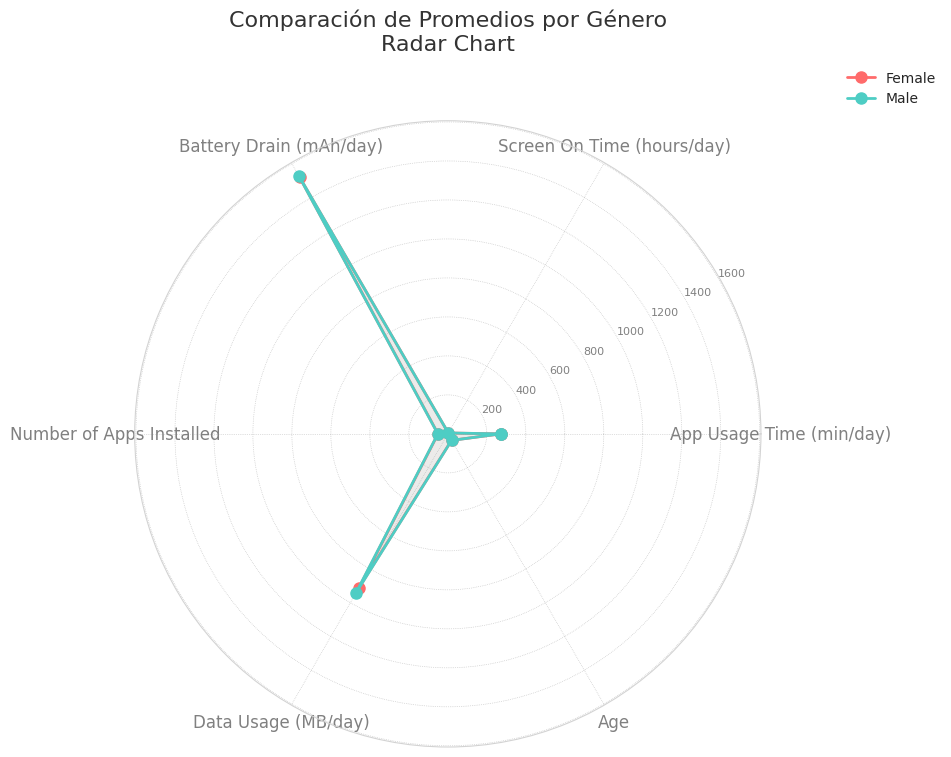

In [10]:
from math import pi

avg_by_gender = df.groupby('Gender')[numeric_cols].mean()

# Configuración del radar
categories = numeric_cols
N = len(categories)
angles = [n / N * 2 * pi for n in range(N)]
angles += angles[:1]  # Cerrar el círculo

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(30)
plt.yticks(color="grey", size=8)
plt.title('Comparación de Promedios por Género\nRadar Chart',
          size=16, y=1.1, color='#333333')

# Plot para cada género
colors = ['#FF6B6B', '#4ECDC4']  # Coral y Turquesa
for i, gender in enumerate(avg_by_gender.index):
    values = avg_by_gender.loc[gender].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i], linewidth=2,
            label=gender, marker='o', markersize=8)
    ax.fill(angles, values, color=colors[i], alpha=0.1)


ax.spines['polar'].set_color('lightgray')
ax.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False)
plt.tight_layout()
plt.show()

El gráfico muestra los promedios de 6 variables de uso móvil comparando hombres (azul) y mujeres (rojo) en un formato radial donde cada eje tiene su propia escala apropiada.

### 🔍 Interpretación General

Las líneas de ambos géneros se **superponen casi completamente** en todas las dimensiones analizadas:

- **🔋 Battery Drain**: ligera ventaja en hombres (~1,550 mAh vs ~1,500 mAh en mujeres)
- **📱 App Usage Time y Screen On Time**: prácticamente **idénticos**
- **📦 Número de Apps Instaladas**
- **📡 Data Usage (MB/day)**
- **👥 Edad promedio**

Estas últimas **cuatro variables no presentan diferencias visibles** entre hombres y mujeres.

---

### ✅ Hallazgos Clave

- Las **diferencias de género son mínimas o inexistentes** en patrones de uso móvil.
- Ambos perfiles muestran **hábitos digitales virtualmente idénticos**.
- El **género NO es un factor determinante** en comportamiento digital.

---

### 🎯 Conclusión

> 📌 **Segmentar por comportamiento de uso es más efectivo que segmentar por género.**

Este análisis confirma que los **hábitos de uso móvil son transversales**, y que otros factores —como las **clases de intensidad de uso**— son mucho más relevantes para estrategias de producto, marketing o diseño de experiencia de usuario.

In [11]:
import plotly.express as px

# Preparar datos en formato largo
df_melted = df.melt(id_vars=['Gender'], value_vars=numeric_cols)
avg_data = df_melted.groupby(['Gender', 'variable']).mean().reset_index()

fig = px.line_polar(
    avg_data,
    r="value",
    theta="variable",
    color="Gender",
    color_discrete_sequence=['#FF6B6B', '#4ECDC4'],
    line_close=True,
    template="plotly_dark",
    title="<b>Radar Chart Interactivo</b><br><i>Promedios por Género</i>"
)

fig.update_traces(fill='toself', mode='lines+markers')
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, gridcolor='gray')),
    font=dict(family="Arial", size=12)
)
fig.show()

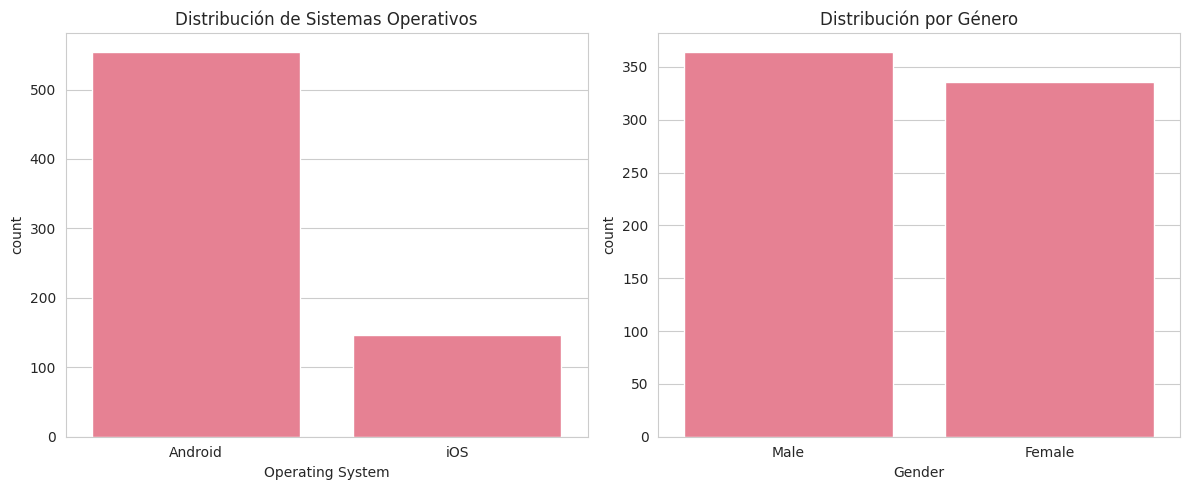

In [12]:
# Gráficos de barras para variables categóricas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Operating System', data=df)
plt.title('Distribución de Sistemas Operativos')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Distribución por Género')
plt.tight_layout()
plt.show()

## 📊 Scatter Plots para relaciones importantes observadas

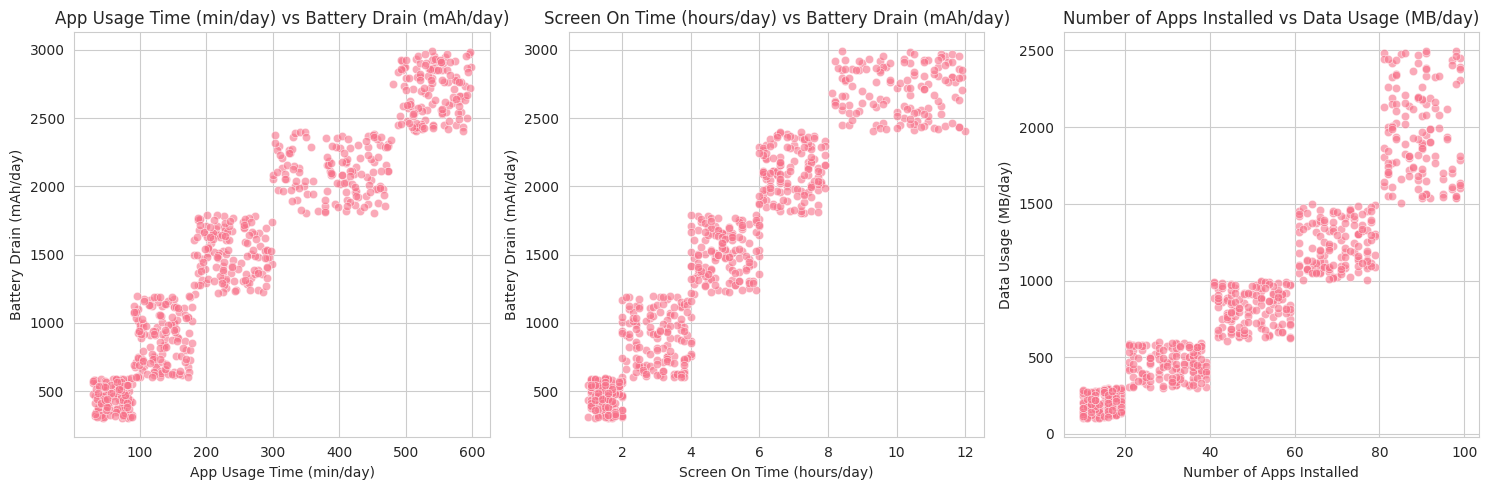

In [13]:
pairs = [('App Usage Time (min/day)', 'Battery Drain (mAh/day)'),
         ('Screen On Time (hours/day)', 'Battery Drain (mAh/day)'),
         ('Number of Apps Installed', 'Data Usage (MB/day)')]

plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=x, y=y, data=df, alpha=0.6)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

### 🔗 **Correlaciones Observadas**

#### **App Usage vs Battery Drain**

* Correlación **lineal muy fuerte**: a mayor uso de apps, mayor consumo de batería.
* Se observa una **progresión escalonada** que sugiere los **5 clusters de comportamiento** previamente identificados.

#### **Screen Time vs Battery Drain**

* Correlación **casi perfecta**: más tiempo de pantalla se traduce en mayor drenaje energético.
* Relación lineal **muy clara y directa**.

#### **Apps Installed vs Data Usage**

* Correlación **positiva moderada**: más apps tienden a generar mayor consumo de datos.
* Mayor dispersión indica que existen **otros factores** que también influyen.

---

### 🔍 **Patrones Visuales**

* Se observan **agrupamientos definidos** que coinciden con las 5 **clases de usuarios**.
* La distribución de puntos **no es aleatoria**, sigue patrones estructurados.
* **Ausencia de outliers extremos**: todos los comportamientos están dentro de los rangos esperados.

---

### 🧠 **Hallazgo Clave**

Las correlaciones fuertes confirman una **escalada de intensidad coherente**:

* Usuarios que usan más apps también tienen más tiempo de pantalla encendida,
* consumen más batería,
* y gastan más datos.

> **No hay usuarios "híbridos"** que combinen un uso ligero en unas métricas con un uso intensivo en otras.

---

### 📌 **Implicación**

Los usuarios muestran **patrones de comportamiento consistentes** en todas las dimensiones, lo que:

* **Valida la segmentación en 5 clases**,
* Cada clase es **homogénea internamente** y **claramente diferenciada** del resto.

## **Top 10 modelos de dispositivos**

/tmp/ipython-input-1431721945.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1431721945.py:8: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



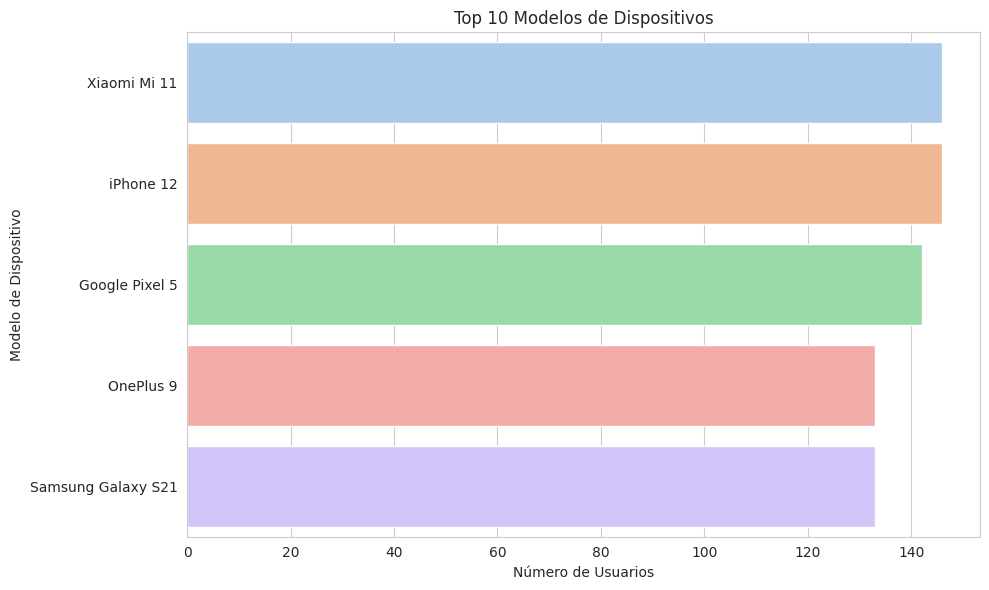

In [14]:
# Obtener los 10 modelos más frecuentes
top_devices = df['Device Model'].value_counts().head(10)

# Paleta de colores pastel
palette = sns.color_palette("pastel", n_colors=10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_devices.values, y=top_devices.index, palette=palette)
plt.title('Top 10 Modelos de Dispositivos')
plt.xlabel('Número de Usuarios')
plt.ylabel('Modelo de Dispositivo')
plt.tight_layout()
plt.show()

## 📊 **Segmentación de Usuarios por Clases de Comportamiento**

/tmp/ipython-input-618396389.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipython-input-618396389.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipython-input-618396389.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipython-input-618396389.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipython-input-618396389.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipython-input-618396389.py:6: 

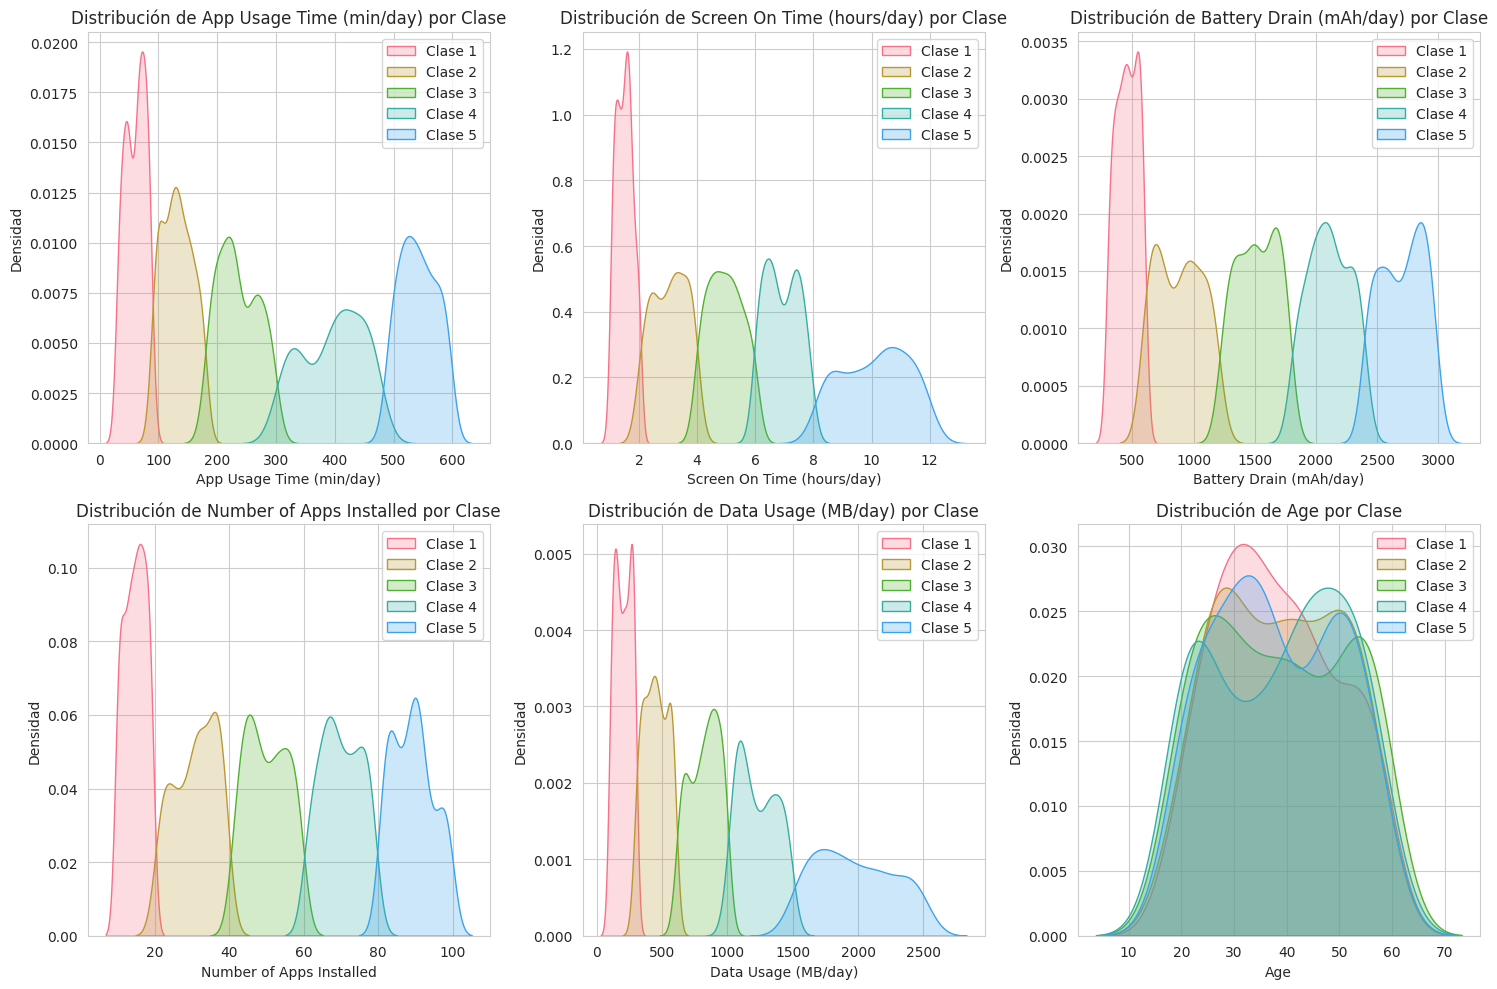

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    for behavior_class in sorted(df['User Behavior Class'].unique()):
        subset = df[df['User Behavior Class'] == behavior_class]
        sns.kdeplot(subset[col], label=f'Clase {behavior_class}', shade=True)
    plt.title(f'Distribución de {col} por Clase')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
plt.tight_layout()
plt.show()

Estos gráficos de densidad permiten identificar patrones muy definidos entre distintos grupos de usuarios, clasificados en 5 clases según su **intensidad de uso**.

---

## 🔻 Distribución de Uso por Clase (Tiempo, Pantalla, Batería)

### 🩷 Clase 1 – Usuarios ligeros
- **App Usage**: ~50-100 min/día  
- **Screen On Time**: ~2-3 horas/día  
- **Battery Drain**: ~500-800 mAh/día

### 💛 Clase 2 – Moderados bajos
- **App Usage**: ~100-150 min/día  
- **Screen On Time**: ~3-4 horas/día  
- **Battery Drain**: ~800-1200 mAh/día

### 💚 Clase 3 – Moderados
- **App Usage**: ~200-250 min/día  
- **Screen On Time**: ~5-6 horas/día  
- **Battery Drain**: ~1200-1600 mAh/día

### 💙 Clase 4 – Intensivos
- **App Usage**: ~350-400 min/día  
- **Screen On Time**: ~7-8 horas/día  
- **Battery Drain**: ~1800-2200 mAh/día

### 💙 Clase 5 – Muy intensivos
- **App Usage**: ~500-600 min/día  
- **Screen On Time**: ~9-11 horas/día  
- **Battery Drain**: ~2200-2800 mAh/día

#### ✅ Hallazgos:
- Segmentación muy clara, sin solapamientos significativos entre clases
- Distribuciones unimodales y homogéneas dentro de cada clase
- Mayor uso de apps correlaciona con mayor tiempo de pantalla y consumo de batería.

### 📦 Number of Apps Installed:
- **Clase 1**: ~10-20 apps  
- **Clase 2**: ~30-40 apps  
- **Clase 3**: ~45-60 apps  
- **Clase 4**: ~60-80 apps  
- **Clase 5**: ~80-100 apps

### 📡 Data Usage (MB/day):
- **Clase 1**: ~100-300 MB  
- **Clase 2**: ~400-600 MB  
- **Clase 3**: ~700-1000 MB  
- **Clase 4**: ~1200-1600 MB  
- **Clase 5**: ~1500-2500+ MB

#### 📍 Hallazgos:
- Progresión lógica e incremental por clase
- Mayor intensidad de uso implica más apps instaladas y mayor consumo de datos

---

## 👥 Edad de los Usuarios por Clase

### 🧓 Age:
- Todas las clases tienen una **distribución etaria muy similar** (~25-55 años)
- **No existe segmentación clara por edad**
- El comportamiento digital **no depende de la edad**

#### 🔎 Hallazgos:
- Usuarios jóvenes y mayores pueden tener patrones de uso similares
- La segmentación basada en comportamiento es **más útil que la demográfica**
- Implicación directa: enfocar estrategias en **hábitos digitales**, no en edad

---

## 🎯 Conclusión

La clasificación en clases revela perfiles bien diferenciados de usuarios en cuanto a uso de apps, pantalla, batería, datos y cantidad de apps. Sin embargo, la edad no determina el comportamiento. Por lo tanto:

> **📌 Las estrategias deben centrarse en segmentos de comportamiento, no en perfiles demográficos tradicionales.**
